### Import Data
The file here is .txt, we use .read_csv. (Already has commas in it) We are also naming the columns.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('ex1data1.txt',header=None,delimiter=',')

In [3]:
df.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data_val = df.values
X = data_val[:,0]
y = data_val[:,1]
y = np.reshape(y,(X.shape[0],1))
#Without reshape, its at (96.)

### Plotting
You concatenate a color string with a line style string as an argument. The default format string is 'b-', which is a solid blue line. Here, r-red. Go through doc for more details

Text(0, 0.5, 'Profit')

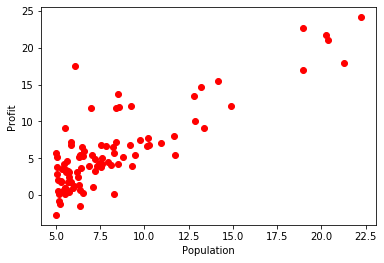

In [5]:
import matplotlib.pyplot as plt
plt.plot(X,y,'ro')
plt.xlabel('Population')
plt.ylabel('Profit')

### Computing Cost and Gradient Descent
For cost, we stack ones to X array to better compute h($\theta$)

In [6]:
#X and Y are numpy arrays
k = X.shape
m = k[0]
X = np.stack([np.ones(m), X], axis=1)

In [7]:
theta = np.zeros((2,1))
pred = np.dot(X,theta)
y.shape

(97, 1)

#### Explanation
Formula is as given in the pdf.
Now, gradient descent is achieved by calculating $\frac{\partial J(\theta)}{\partial \theta_j}$
We require h($\theta$) - y and this has to be multiplied to each of two values of X i.e. $X_1$ and $X_2$ for a given example, and then continue to do so for all the examples.

In [8]:
diff = pred - y
diff.shape

(97, 1)

In [9]:
alpha = 0.01
iterations = 1500
m = y.shape[0]
for i in range(iterations):
    pred = np.dot(X,theta)
    diff = pred - y
    theta = theta - ((alpha / m) * (np.dot(X.T,diff)))
    #print(theta)
    if i % 100 == 0:
        cost = (1 / (2 * m)) * np.sum(np.square(diff))
        cost = str(round(cost,2))
        print(cost," is the cost for iter number", i) 

32.07  is the cost for iter number 0
5.48  is the cost for iter number 100
5.18  is the cost for iter number 200
4.96  is the cost for iter number 300
4.82  is the cost for iter number 400
4.71  is the cost for iter number 500
4.64  is the cost for iter number 600
4.59  is the cost for iter number 700
4.56  is the cost for iter number 800
4.53  is the cost for iter number 900
4.52  is the cost for iter number 1000
4.5  is the cost for iter number 1100
4.5  is the cost for iter number 1200
4.49  is the cost for iter number 1300
4.49  is the cost for iter number 1400


### Model obtained

In [10]:
theta

array([[-3.63029144],
       [ 1.16636235]])

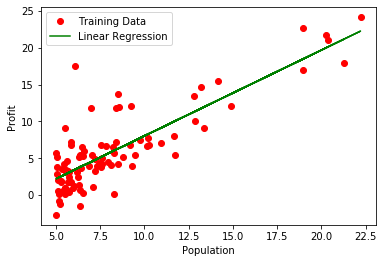

In [11]:
plt.plot(X[:,1],y,'ro')
plt.plot(X[:,1],np.dot(X,theta),'g')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.legend(["Training Data","Linear Regression"])